AMBIKA RAJPUROHIT - AIML

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
url = 'https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true'
read_file = pd.read_csv (url)
read_file.to_csv ('airbnb.csv', index=None)
# read first 5 rows
df = pd.read_csv('airbnb.csv')
df.head()

Unnamed: 0  listing_id                                               name  \
0           0    13740704  Cozy,budget friendly, cable inc, private entra...   
1           1    22005115              Two floor apartment near Central Park   
2           2    21667615                  Beautiful 1BR in Brooklyn Heights   
3           3     6425850                          Spacious, charming studio   
4           4    22986519              Bedroom on the lively Lower East Side   

     host_id host_name          neighbourhood_full            coordinates  \
0   20583125    Michel         Brooklyn, Flatlands  (40.63222, -73.93398)   
1   82746113   Cecilia  Manhattan, Upper West Side  (40.78761, -73.96862)   
2      78251    Leslie  Brooklyn, Brooklyn Heights   (40.7007, -73.99517)   
3   32715865    Yelena  Manhattan, Upper West Side  (40.79169, -73.97498)   
4  154262349    Brooke  Manhattan, Lower East Side  (40.71884, -73.98354)   

         room_type price  number_of_reviews last_review  reviews_per_month  \
0     Private room   45$                 10  2018-12-12               0.70   
1  Entire home/apt  135$                  1  2019-06-30               1.00   
2  Entire home/apt  150$                  0         NaN                NaN   
3  Entire home/apt   86$                  5  2017-09-23               0.13   
4     Private room  160$                 23  2019-06-12               2.29   

   availability_365    rating  number_of_stays   5_stars listing_added  
0                85  4.100954             12.0  0.609432    2018-06-08  
1               145  3.367600              1.2  0.746135    2018-12-25  
2                65       NaN              NaN       NaN    2018-08-15  
3                 0  4.763203              6.0  0.769947    2017-03-20  
4               102  3.822591             27.6  0.649383    2020-10-23

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

In [5]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df.dropna(subset=['coordinates', 'price'], inplace=True)

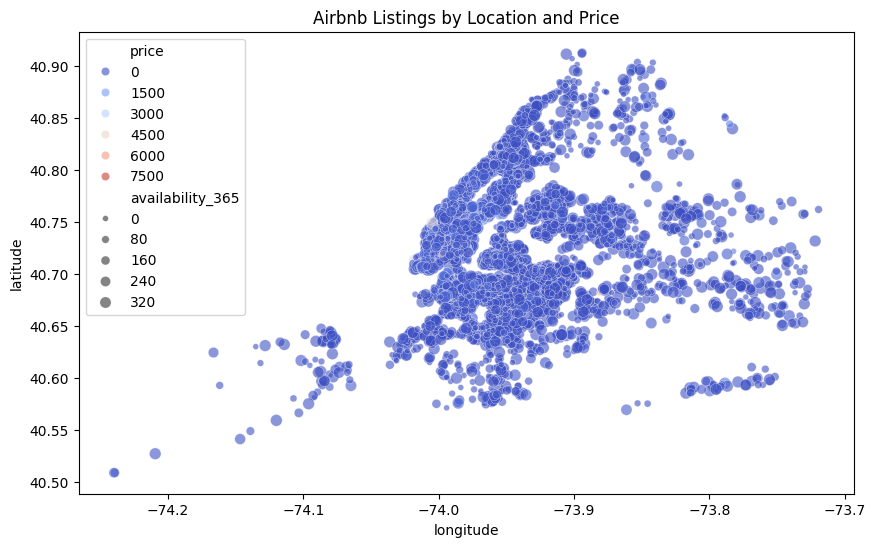

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract latitude and longitude from the 'coordinates' column
df[['latitude', 'longitude']] = df['coordinates'].str.replace('(', '').str.replace(')', '').str.split(', ', expand=True)

# Convert latitude and longitude columns to numeric
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])


plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', size='availability_365',
                data=df, palette='coolwarm', alpha=0.6)
plt.title('Airbnb Listings by Location and Price')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9781 entries, 0 to 10018
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9781 non-null   int64  
 1   listing_id          9781 non-null   int64  
 2   name                9776 non-null   object 
 3   host_id             9781 non-null   int64  
 4   host_name           9779 non-null   object 
 5   neighbourhood_full  9781 non-null   object 
 6   coordinates         9781 non-null   object 
 7   room_type           9781 non-null   object 
 8   price               9781 non-null   float64
 9   number_of_reviews   9781 non-null   int64  
 10  last_review         7753 non-null   object 
 11  reviews_per_month   7753 non-null   float64
 12  availability_365    9781 non-null   int64  
 13  rating              7753 non-null   float64
 14  number_of_stays     7753 non-null   float64
 15  5_stars             7753 non-null   float64
 16  listing_ad

In [8]:
df.isna().sum()

Unnamed: 0               0
listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                    0
number_of_reviews        0
last_review           2028
reviews_per_month     2028
availability_365         0
rating                2028
number_of_stays       2028
5_stars               2028
listing_added            0
latitude                 0
longitude                0
dtype: int64

In [9]:
df.describe()

Unnamed: 0    listing_id       host_id        price  \
count   9781.000000  9.781000e+03  9.781000e+03  9781.000000   
mean    5003.825989  1.930602e+07  6.808891e+07   150.905122   
std     2891.304698  1.095656e+07  7.871215e+07   205.877428   
min        0.000000  3.831000e+03  2.787000e+03     0.000000   
25%     2504.000000  9.697749e+06  7.950356e+06    69.000000   
50%     5001.000000  2.012526e+07  3.167887e+07   106.000000   
75%     7503.000000  2.941006e+07  1.074344e+08   180.000000   
max    10018.000000  3.648724e+07  2.741034e+08  8000.000000   

       number_of_reviews  reviews_per_month  availability_365       rating  \
count        9781.000000        7753.000000       9781.000000  7753.000000   
mean           22.460076           1.352941        112.608629     4.012884   
std            43.339259           1.611913        131.762503     0.575167   
min             0.000000           0.010000          0.000000     3.000633   
25%             1.000000           0.200000          0.000000     3.519034   
50%             5.000000           0.710000         44.000000     4.024336   
75%            22.000000           2.000000        228.000000     4.514836   
max           510.000000          16.220000        365.000000     5.181114   

       number_of_stays      5_stars     latitude    longitude  
count      7753.000000  7753.000000  9781.000000  9781.000000  
mean         34.002115     0.718567    40.729146   -73.952053  
std          56.325657     0.079860     0.054568     0.045834  
min           1.200000     0.600026    40.508680   -74.239860  
25%           3.600000     0.655454    40.689920   -73.983040  
50%          10.800000     0.709864    40.723090   -73.955590  
75%          38.400000     0.763977    40.763430   -73.936270  
max         612.000000     0.950339    40.913060   -73.719280

In [10]:
df['room_type'].value_counts()

room_type
Entire home/apt         5021
Private room            4359
Shared room              150
Private                   86
   Shared room            69
home                      65
PRIVATE ROOM              31
Name: count, dtype: int64

In [11]:
#replace
df['room_type'] = df['room_type'].replace(['Private', 'private_room', 'PRIVATE_ROOM'])


/tmp/ipython-input-11-358071700.py:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['room_type'] = df['room_type'].replace(['Private', 'private_room', 'PRIVATE_ROOM'])


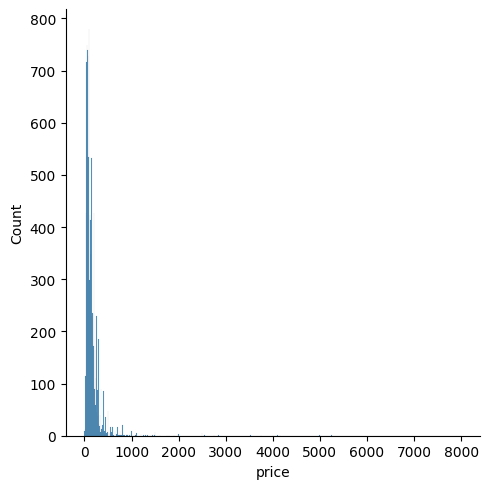

In [12]:
distplot = sns.displot(df['price'])

In [13]:
import pandas as pd
url = 'https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true'
df = pd.read_csv(url)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df.dropna(subset=['coordinates', 'price'], inplace=True)

df.info()
df.isnull().sum()
df['neighbourhood_full'].value_counts()



<class 'pandas.core.frame.DataFrame'>
Index: 9781 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9781 non-null   int64  
 1   listing_id          9781 non-null   int64  
 2   name                9776 non-null   object 
 3   host_id             9781 non-null   int64  
 4   host_name           9779 non-null   object 
 5   neighbourhood_full  9781 non-null   object 
 6   coordinates         9781 non-null   object 
 7   room_type           9781 non-null   object 
 8   price               9781 non-null   float64
 9   number_of_reviews   9781 non-null   int64  
 10  last_review         7753 non-null   object 
 11  reviews_per_month   7753 non-null   float64
 12  availability_365    9781 non-null   int64  
 13  rating              7753 non-null   float64
 14  number_of_stays     7753 non-null   float64
 15  5_stars             7753 non-null   float64
 16  listing_ad

neighbourhood_full
Brooklyn, Bedford-Stuyvesant      756
Brooklyn, Williamsburg            746
Manhattan, Harlem                 523
Brooklyn, Bushwick                488
Manhattan, Hell's Kitchen         399
                                 ... 
Queens, Neponsit                    1
Staten Island, Great Kills          1
Staten Island, Midland Beach        1
Bronx, Eastchester                  1
Staten Island, New Springville      1
Name: count, Length: 197, dtype: int64

In [14]:
most_cheapest_room = df[df['price'] == df['price'].min()]
print(most_cheapest_room)

      Unnamed: 0  listing_id  \
4645        4645    20933849   
8509        8509    18750597   

                                                   name   host_id host_name  \
4645                              the best you can find  13709292    Qiuchi   
8509  Huge Brooklyn Brownstone Living, Close to it all.   8993084  Kimberly   

                neighbourhood_full                     coordinates  \
4645        Manhattan, Murray Hill  (40.75091, -73.97596999999998)   
8509  Brooklyn, Bedford-Stuyvesant  (40.69023, -73.95428000000003)   

            room_type  price  number_of_reviews last_review  \
4645  Entire home/apt    0.0                  0         NaN   
8509     Private room    0.0                  1  2018-01-06   

      reviews_per_month  availability_365    rating  number_of_stays  \
4645                NaN                 0       NaN              NaN   
8509               0.05                28  3.778723              1.2   

       5_stars listing_added  
4645       NaN  

In [15]:
most_expensive_room = df[df['price'] == df['price'].max()]
print(most_expensive_room)


      Unnamed: 0  listing_id           name  host_id host_name  \
3858        3858     2953058  Film Location  1177497   Jessica   

          neighbourhood_full            coordinates        room_type   price  \
3858  Brooklyn, Clinton Hill  (40.69137, -73.96723)  Entire home/apt  8000.0   

      number_of_reviews last_review  reviews_per_month  availability_365  \
3858                  1  2016-09-15               0.03               365   

        rating  number_of_stays   5_stars listing_added  
3858  4.052232              1.2  0.768022    2016-03-12  


In [16]:
place_names = df['neighbourhood_full'].unique()
print(place_names)

['Brooklyn, Flatlands' 'Manhattan, Upper West Side'
 'Brooklyn, Brooklyn Heights' 'Manhattan, Lower East Side'
 'Manhattan, Greenwich Village' 'Manhattan, Harlem'
 'Brooklyn, Sheepshead Bay' 'Manhattan, Theater District'
 'Brooklyn, Bushwick' 'Queens, Laurelton' 'Bronx, Mott Haven'
 'Queens, Flushing' 'Brooklyn, Crown Heights' 'Manhattan, Midtown'
 'Manhattan, Financial District' 'Manhattan, East Village'
 'Brooklyn, Park Slope' 'Manhattan, Washington Heights'
 'Brooklyn, Williamsburg' 'Manhattan, Chelsea'
 'Brooklyn, Bedford-Stuyvesant' 'Brooklyn, Gowanus'
 'Manhattan, Upper East Side' 'Queens, Ditmars Steinway'
 'Brooklyn, Cypress Hills' "Manhattan, Hell's Kitchen" 'Queens, Ridgewood'
 'Manhattan, Marble Hill' 'Manhattan, Kips Bay'
 'Brooklyn, Prospect Heights' 'Brooklyn, East New York'
 'Staten Island, Concord' 'Staten Island, Stapleton' 'Queens, Astoria'
 'Manhattan, East Harlem' 'Queens, Sunnyside' 'Manhattan, Gramercy'
 'Brooklyn, Prospect-Lefferts Gardens' 'Brooklyn, Sunset Park

In [17]:
median_price = df['price'].median()
affordable_rooms = df[df['price'] < median_price]
affordable_rooms[['name', 'neighbourhood_full', 'room_type', 'price']].head()

name  \
0   Cozy,budget friendly, cable inc, private entra...   
3                           Spacious, charming studio   
9     Enjoy all of Manhattan. Big Apple! A Mini-MOMA!   
10      Cozy and extremely well located Bushwick room   
12  #3 Private  Quadruple  Room  20mnts from Manha...   

            neighbourhood_full        room_type  price  
0          Brooklyn, Flatlands     Private room   45.0  
3   Manhattan, Upper West Side  Entire home/apt   86.0  
9            Manhattan, Harlem  Entire home/apt   75.0  
10          Brooklyn, Bushwick     Private room   50.0  
12           Bronx, Mott Haven     Private room   41.0

In [18]:
df_filtered = df[['name', 'price', 'neighbourhood_full']]
df_filtered

name  price  \
0      Cozy,budget friendly, cable inc, private entra...   45.0   
1                  Two floor apartment near Central Park  135.0   
2                      Beautiful 1BR in Brooklyn Heights  150.0   
3                              Spacious, charming studio   86.0   
4                  Bedroom on the lively Lower East Side  160.0   
...                                                  ...    ...   
10014                        Lovely 1BR Harlem apartment  105.0   
10015                Apartment For Your Holidays in NYC!  125.0   
10016          Artsy, Garden Getaway in Central Brooklyn  100.0   
10017     Immaculate townhouse in Clinton Hill, Brooklyn  450.0   
10018     Private room in a perfect location in the city   90.0   

               neighbourhood_full  
0             Brooklyn, Flatlands  
1      Manhattan, Upper West Side  
2      Brooklyn, Brooklyn Heights  
3      Manhattan, Upper West Side  
4      Manhattan, Lower East Side  
...                           ...  
10014           Manhattan, Harlem  
10015      Manhattan, East Harlem  
10016      Brooklyn, Clinton Hill  
10017      Brooklyn, Clinton Hill  
10018  Manhattan, Upper East Side  

[9781 rows x 3 columns]

In [19]:
most_crowded_place = df['neighbourhood_full'].value_counts().head(1)
print("The most crowded place is:\n", most_crowded_place)

The most crowded place is:
 neighbourhood_full
Brooklyn, Bedford-Stuyvesant    756
Name: count, dtype: int64


In [20]:
df[['availability_365', 'price']].corr()

availability_365     price
availability_365          1.000000  0.085686
price                     0.085686  1.000000

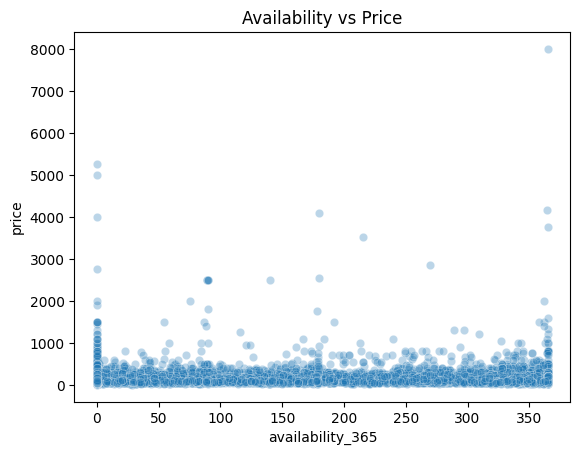

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.3)
plt.title('Availability vs Price')
plt.show()

In [22]:
df['availability'] = pd.cut(df['availability_365'], bins=[0, 90, 180, 270, 365],
                                  labels=['0-90 days', '91-180', '181-270', '271-365'])

df.groupby('availability')['price'].mean()

/tmp/ipython-input-22-1051558057.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('availability')['price'].mean()


availability
0-90 days    142.337308
91-180       159.684312
181-270      171.273823
271-365      174.752923
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

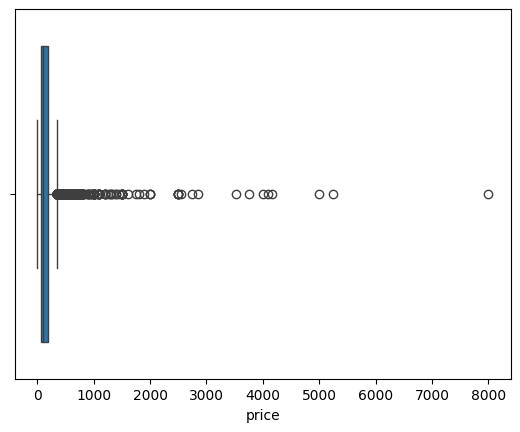

In [23]:
sns.boxplot(x=df["price"])
plt.show

In [24]:
mean_price = df.groupby('neighbourhood_full')['price'].mean()
print(mean_price)

neighbourhood_full
Bronx, Allerton                 107.666667
Bronx, Baychester                75.000000
Bronx, Belmont                   87.166667
Bronx, Bronxdale                 53.166667
Bronx, Castle Hill               62.000000
                                   ...    
Staten Island, Stapleton         73.250000
Staten Island, Tompkinsville     57.857143
Staten Island, Tottenville      192.000000
Staten Island, West Brighton     57.000000
Staten Island, Westerleigh       40.000000
Name: price, Length: 197, dtype: float64


In [25]:
filter_data = df[(df['price'] > 10) & (df['price'] < 500)]
filter_data

Unnamed: 0  listing_id  \
0               0    13740704   
1               1    22005115   
2               2    21667615   
3               3     6425850   
4               4    22986519   
...           ...         ...   
10014       10014    22307861   
10015       10015      953275   
10016       10016     3452835   
10017       10017    23540194   
10018       10018    32876011   

                                                    name    host_id host_name  \
0      Cozy,budget friendly, cable inc, private entra...   20583125    Michel   
1                  Two floor apartment near Central Park   82746113   Cecilia   
2                      Beautiful 1BR in Brooklyn Heights      78251    Leslie   
3                              Spacious, charming studio   32715865    Yelena   
4                  Bedroom on the lively Lower East Side  154262349    Brooke   
...                                                  ...        ...       ...   
10014                        Lovely 1BR Harlem apartment   16004068    Rachel   
10015                Apartment For Your Holidays in NYC!    4460034     Alain   
10016          Artsy, Garden Getaway in Central Brooklyn     666862       Amy   
10017     Immaculate townhouse in Clinton Hill, Brooklyn   67176930    Sophie   
10018     Private room in a perfect location in the city   59583716      Shai   

               neighbourhood_full                     coordinates  \
0             Brooklyn, Flatlands           (40.63222, -73.93398)   
1      Manhattan, Upper West Side           (40.78761, -73.96862)   
2      Brooklyn, Brooklyn Heights            (40.7007, -73.99517)   
3      Manhattan, Upper West Side           (40.79169, -73.97498)   
4      Manhattan, Lower East Side           (40.71884, -73.98354)   
...                           ...                             ...   
10014           Manhattan, Harlem           (40.80379, -73.95257)   
10015      Manhattan, East Harlem            (40.79531, -73.9333)   
10016      Brooklyn, Clinton Hill  (40.68266, -73.96743000000002)   
10017      Brooklyn, Clinton Hill           (40.68832, -73.96366)   
10018  Manhattan, Upper East Side           (40.76174, -73.96625)   

             room_type  price  number_of_reviews last_review  \
0         Private room   45.0                 10  2018-12-12   
1      Entire home/apt  135.0                  1  2019-06-30   
2      Entire home/apt  150.0                  0         NaN   
3      Entire home/apt   86.0                  5  2017-09-23   
4         Private room  160.0                 23  2019-06-12   
...                ...    ...                ...         ...   
10014  Entire home/apt  105.0                  4  2018-05-28   
10015  Entire home/apt  125.0                 50  2018-05-06   
10016  Entire home/apt  100.0                 45  2016-11-27   
10017  Entire home/apt  450.0                  2  2019-05-31   
10018     Private room   90.0                  1  2019-03-12   

       reviews_per_month  availability_365    rating  number_of_stays  \
0                   0.70                85  4.100954             12.0   
1                   1.00               145  3.367600              1.2   
2                    NaN                65       NaN              NaN   
3                   0.13                 0  4.763203              6.0   
4                   2.29               102  3.822591             27.6   
...                  ...               ...       ...              ...   
10014               0.21                 0  4.757555              4.8   
10015               0.66               188  4.344704             60.0   
10016               0.98                 0  3.966214             54.0   
10017               0.17                99  4.078581              2.4   
10018               0.25                 8  4.069096              1.2   

        5_stars listing_added availability  
0      0.609432    2018-06-08    0-90 days  
1      0.746135    2018-12-25       91-180  
2           NaN    2018-08-

In [26]:
filter_data['price'].max()

499.0

In [27]:
filter_data['price'].min()

16.0

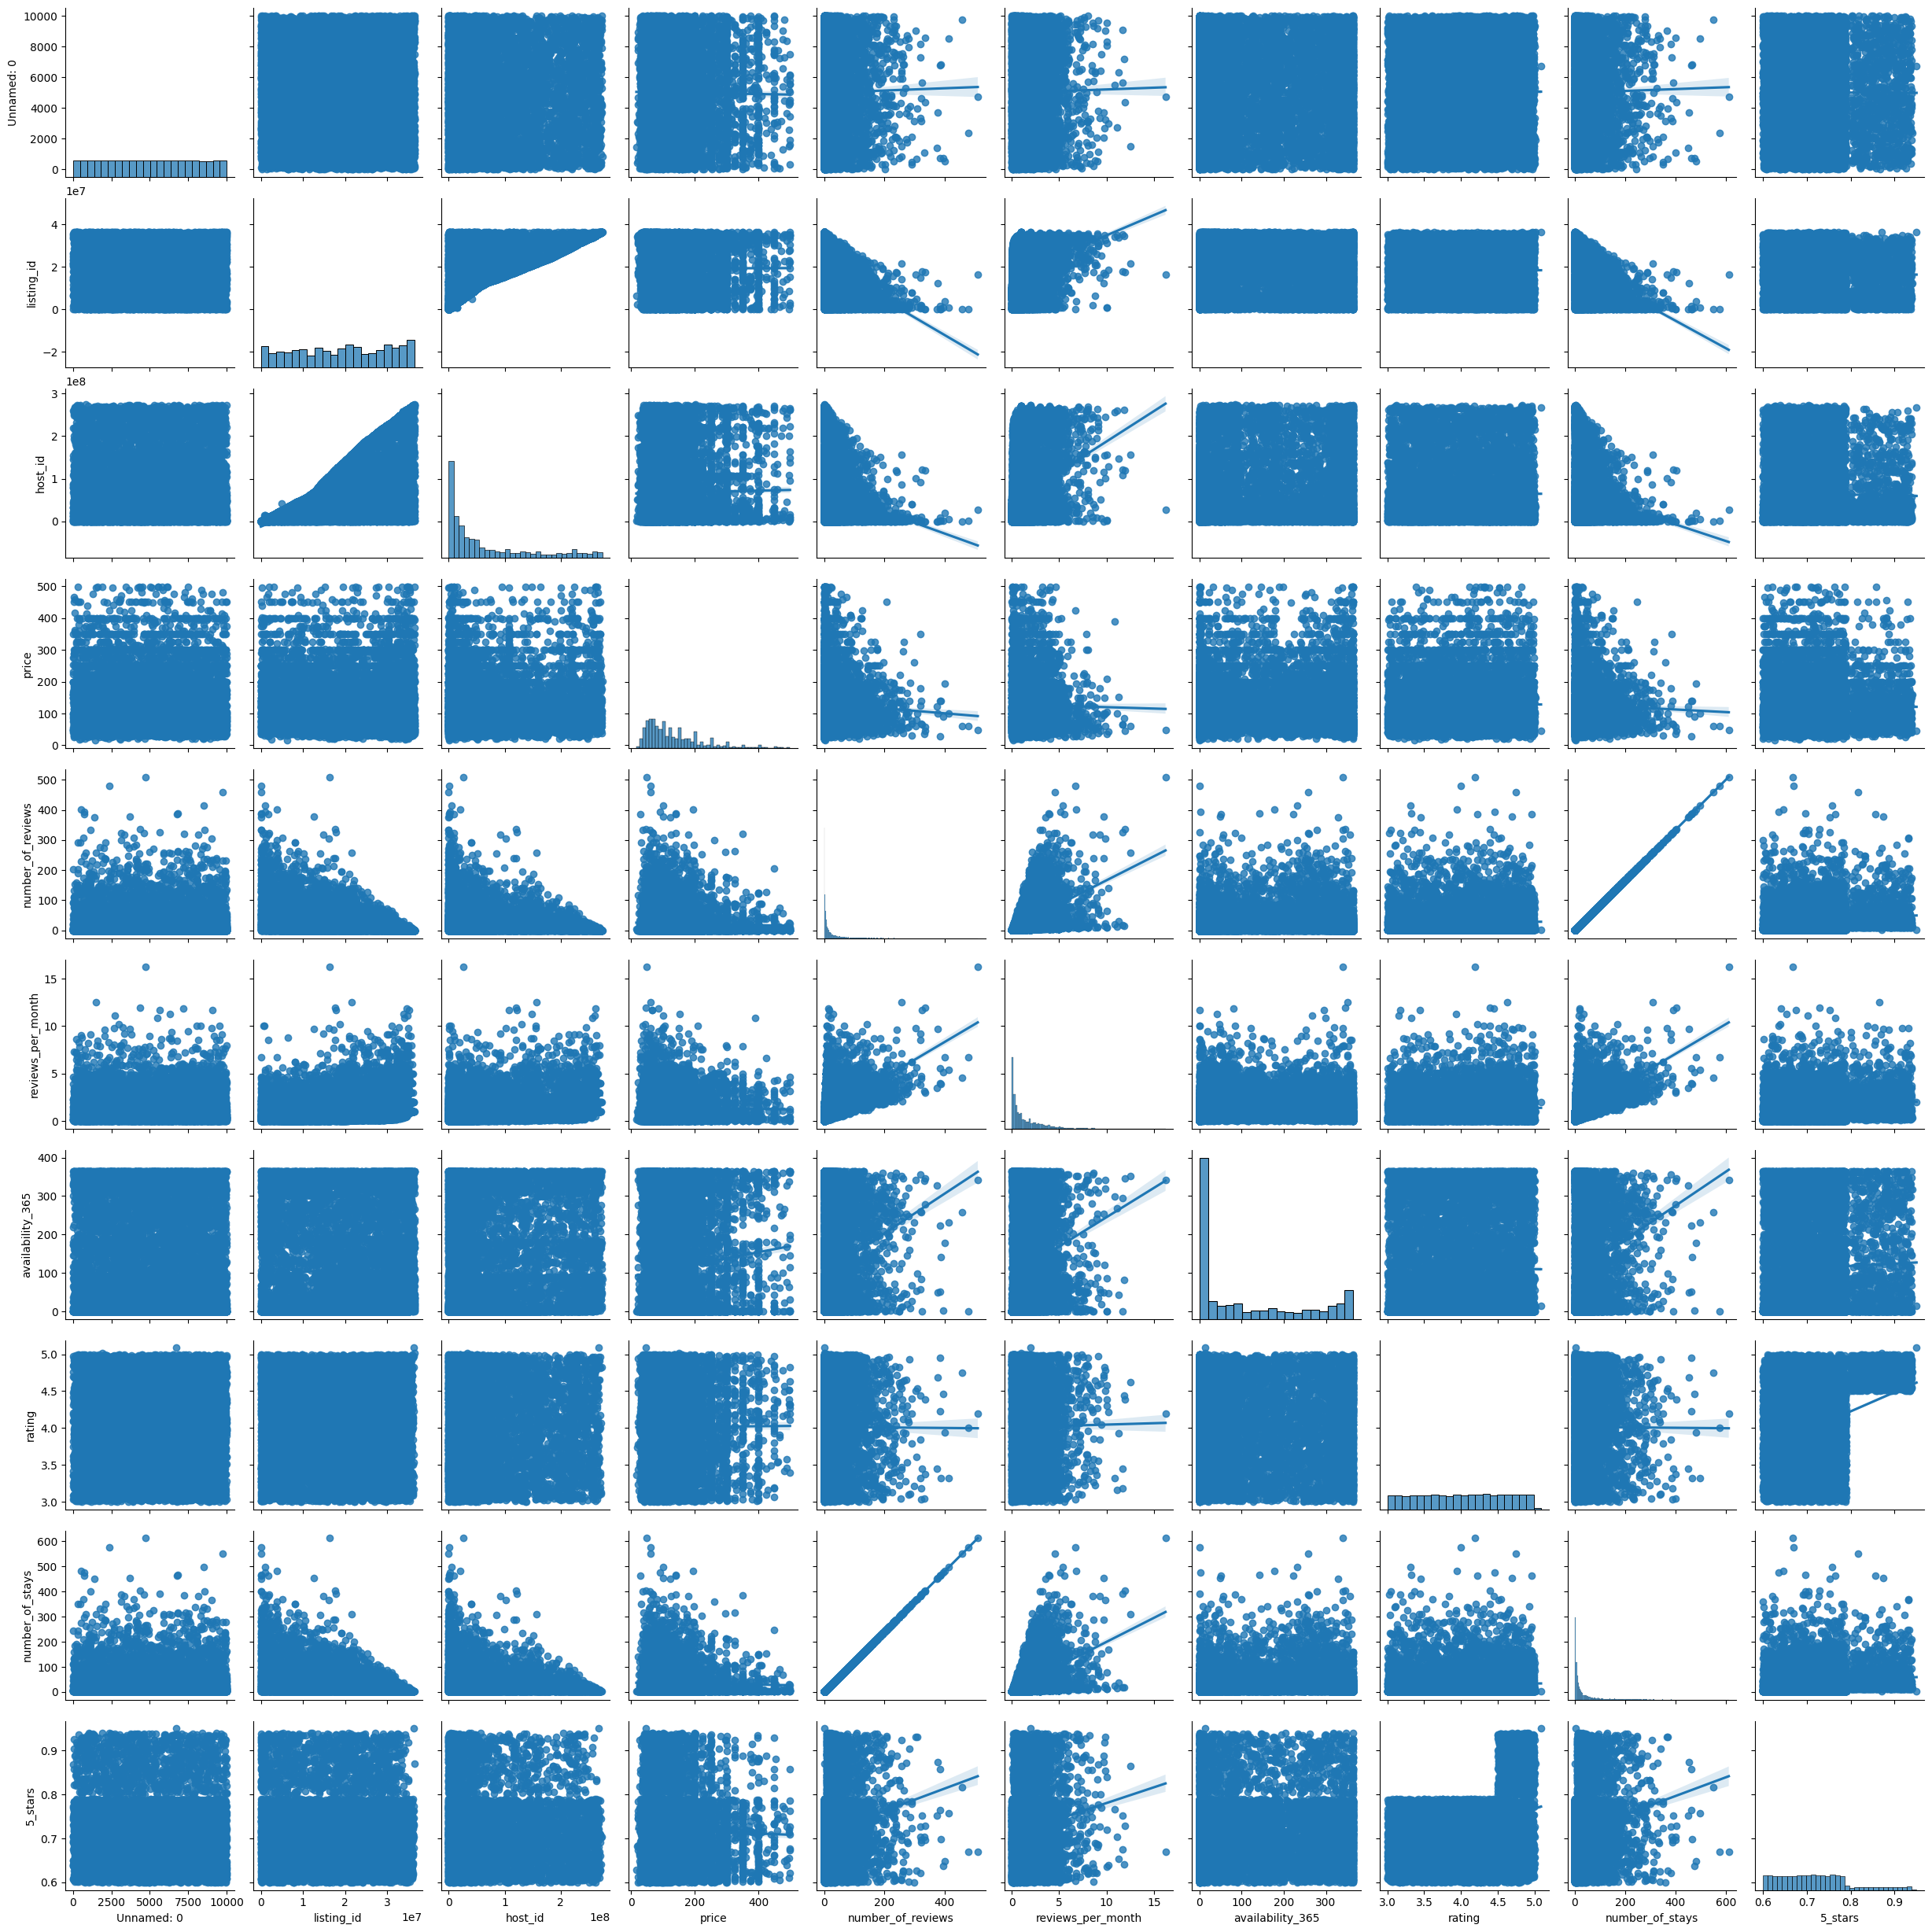

In [28]:
sns.pairplot(filter_data, kind='reg')
plt.show()

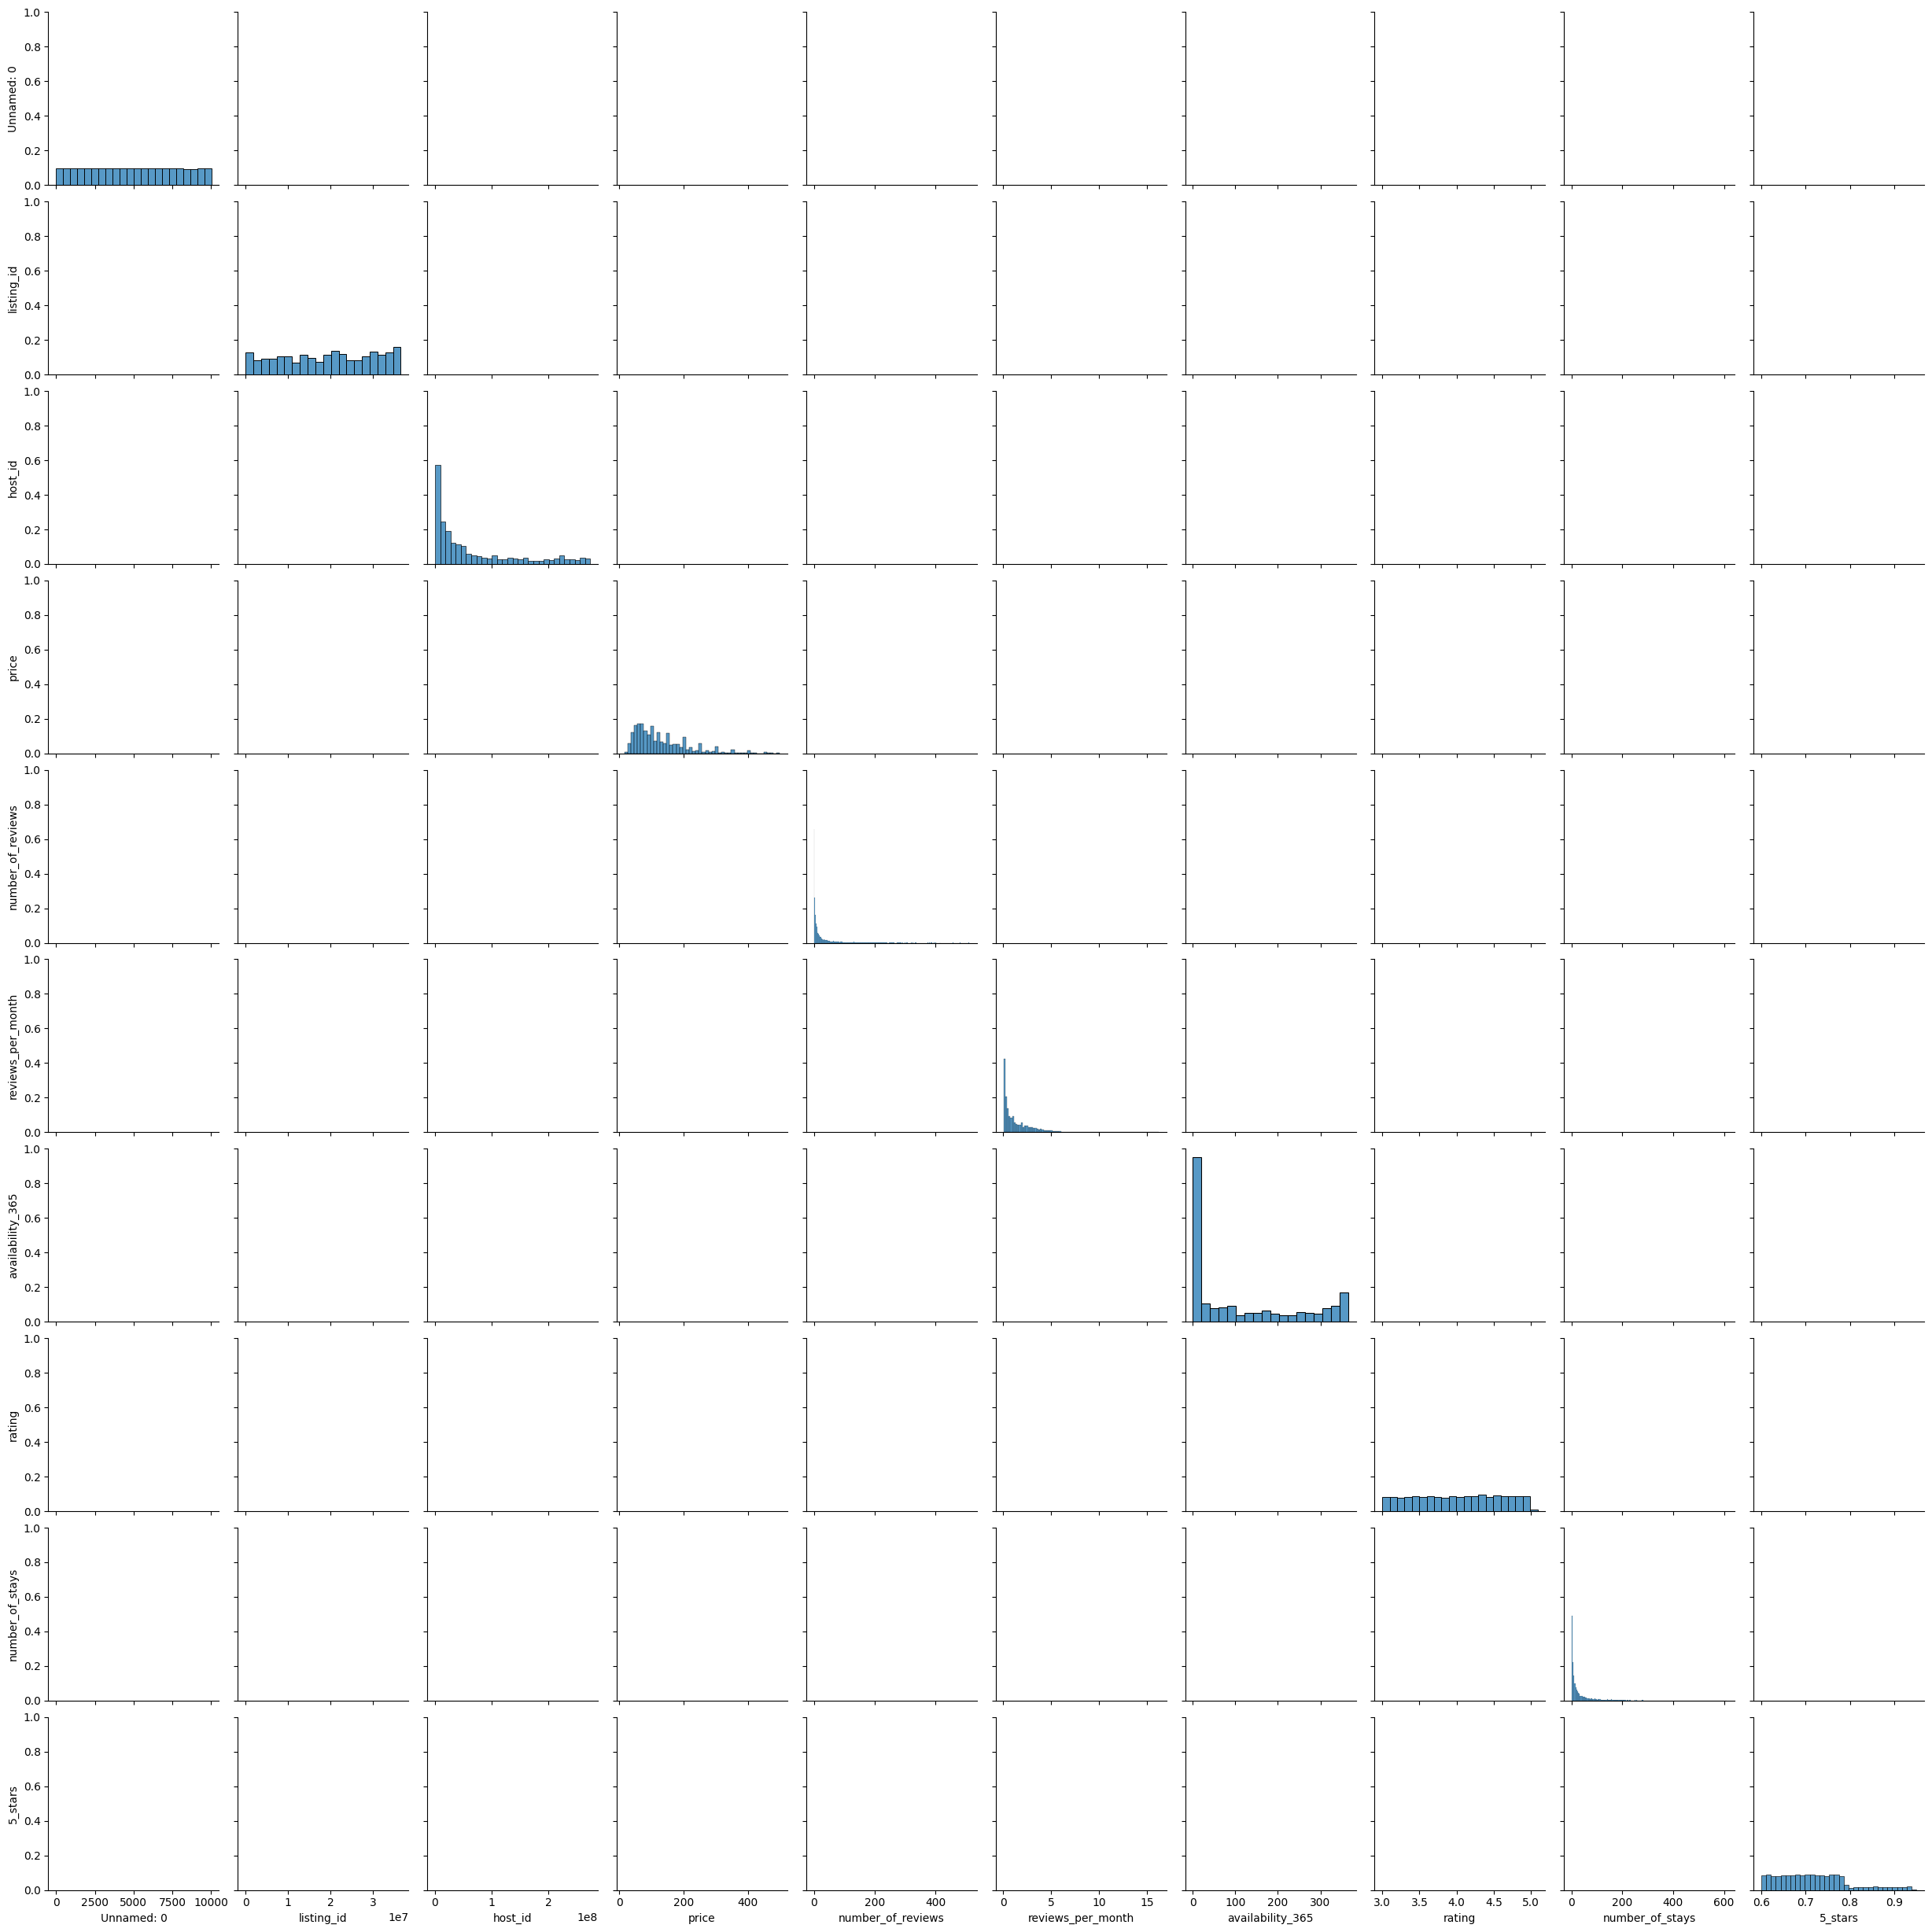

In [29]:
sns.pairplot(filter_data, kind='hex')
plt.show()

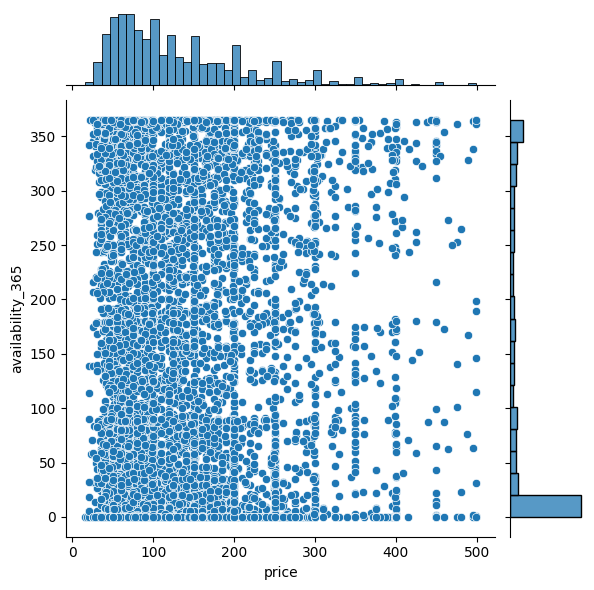

In [30]:
sns.jointplot(data=filter_data, x='price', y='availability_365', kind='scatter')
plt.show()

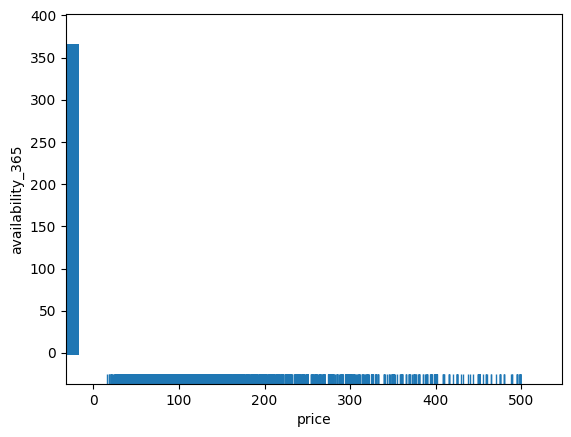

In [31]:
sns.rugplot(data=filter_data, x='price', y='availability_365')
plt.show()

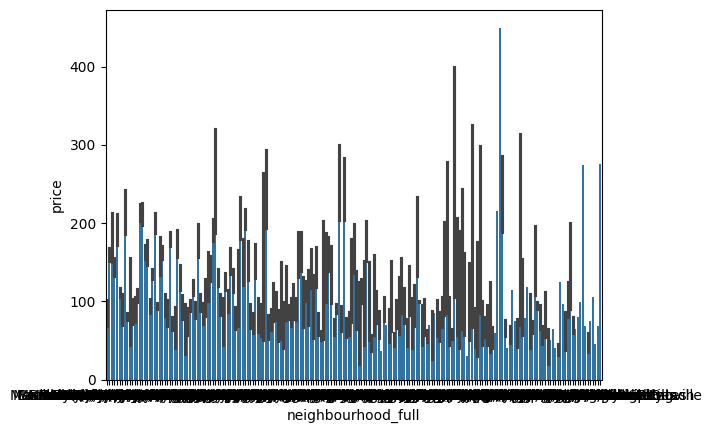

In [32]:
sns.barplot(data=filter_data, x='neighbourhood_full', y='price')
plt.show()

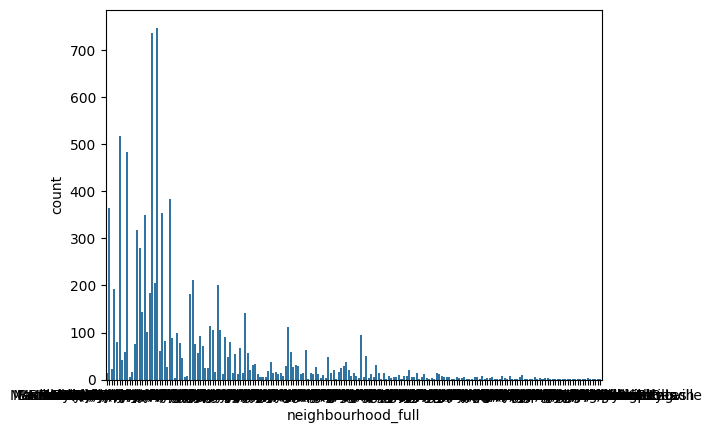

In [33]:
sns.countplot(data=filter_data, x='neighbourhood_full')
plt.show()

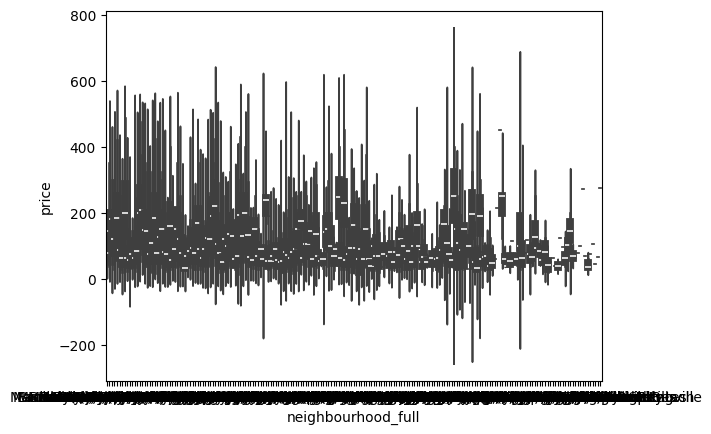

In [34]:
sns.violinplot(data=filter_data, x='neighbourhood_full', y='price')
plt.show()

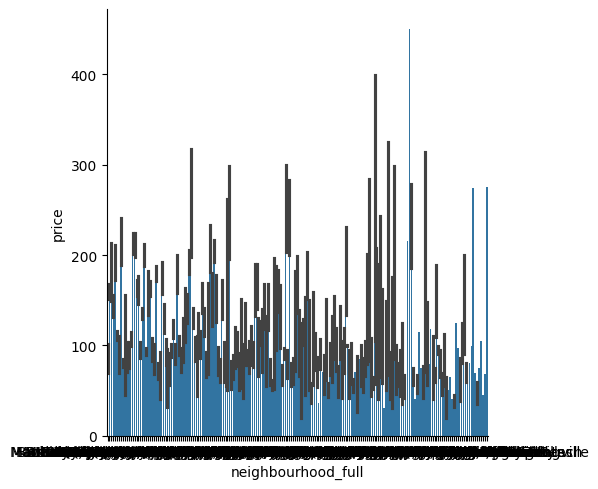

In [35]:
sns.catplot(data=filter_data, x='neighbourhood_full', y='price', kind='bar')
plt.show()

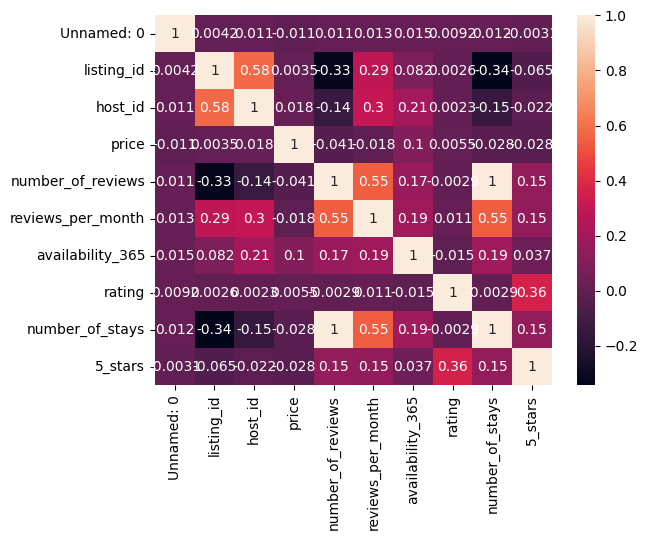

In [36]:
numeric_filter_data = filter_data.select_dtypes(include=np.number)
sns.heatmap(numeric_filter_data.corr(), annot=True)
plt.show()

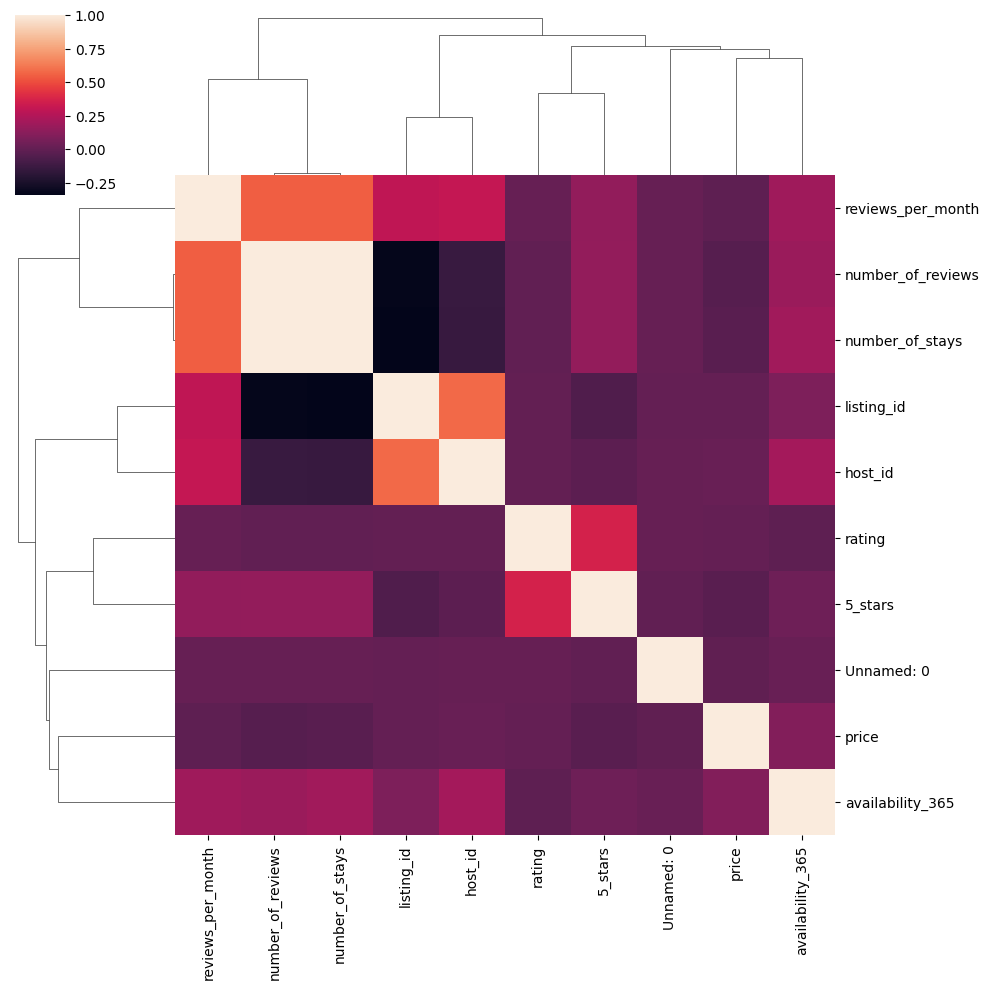

In [37]:
sns.clustermap(numeric_filter_data.corr())
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


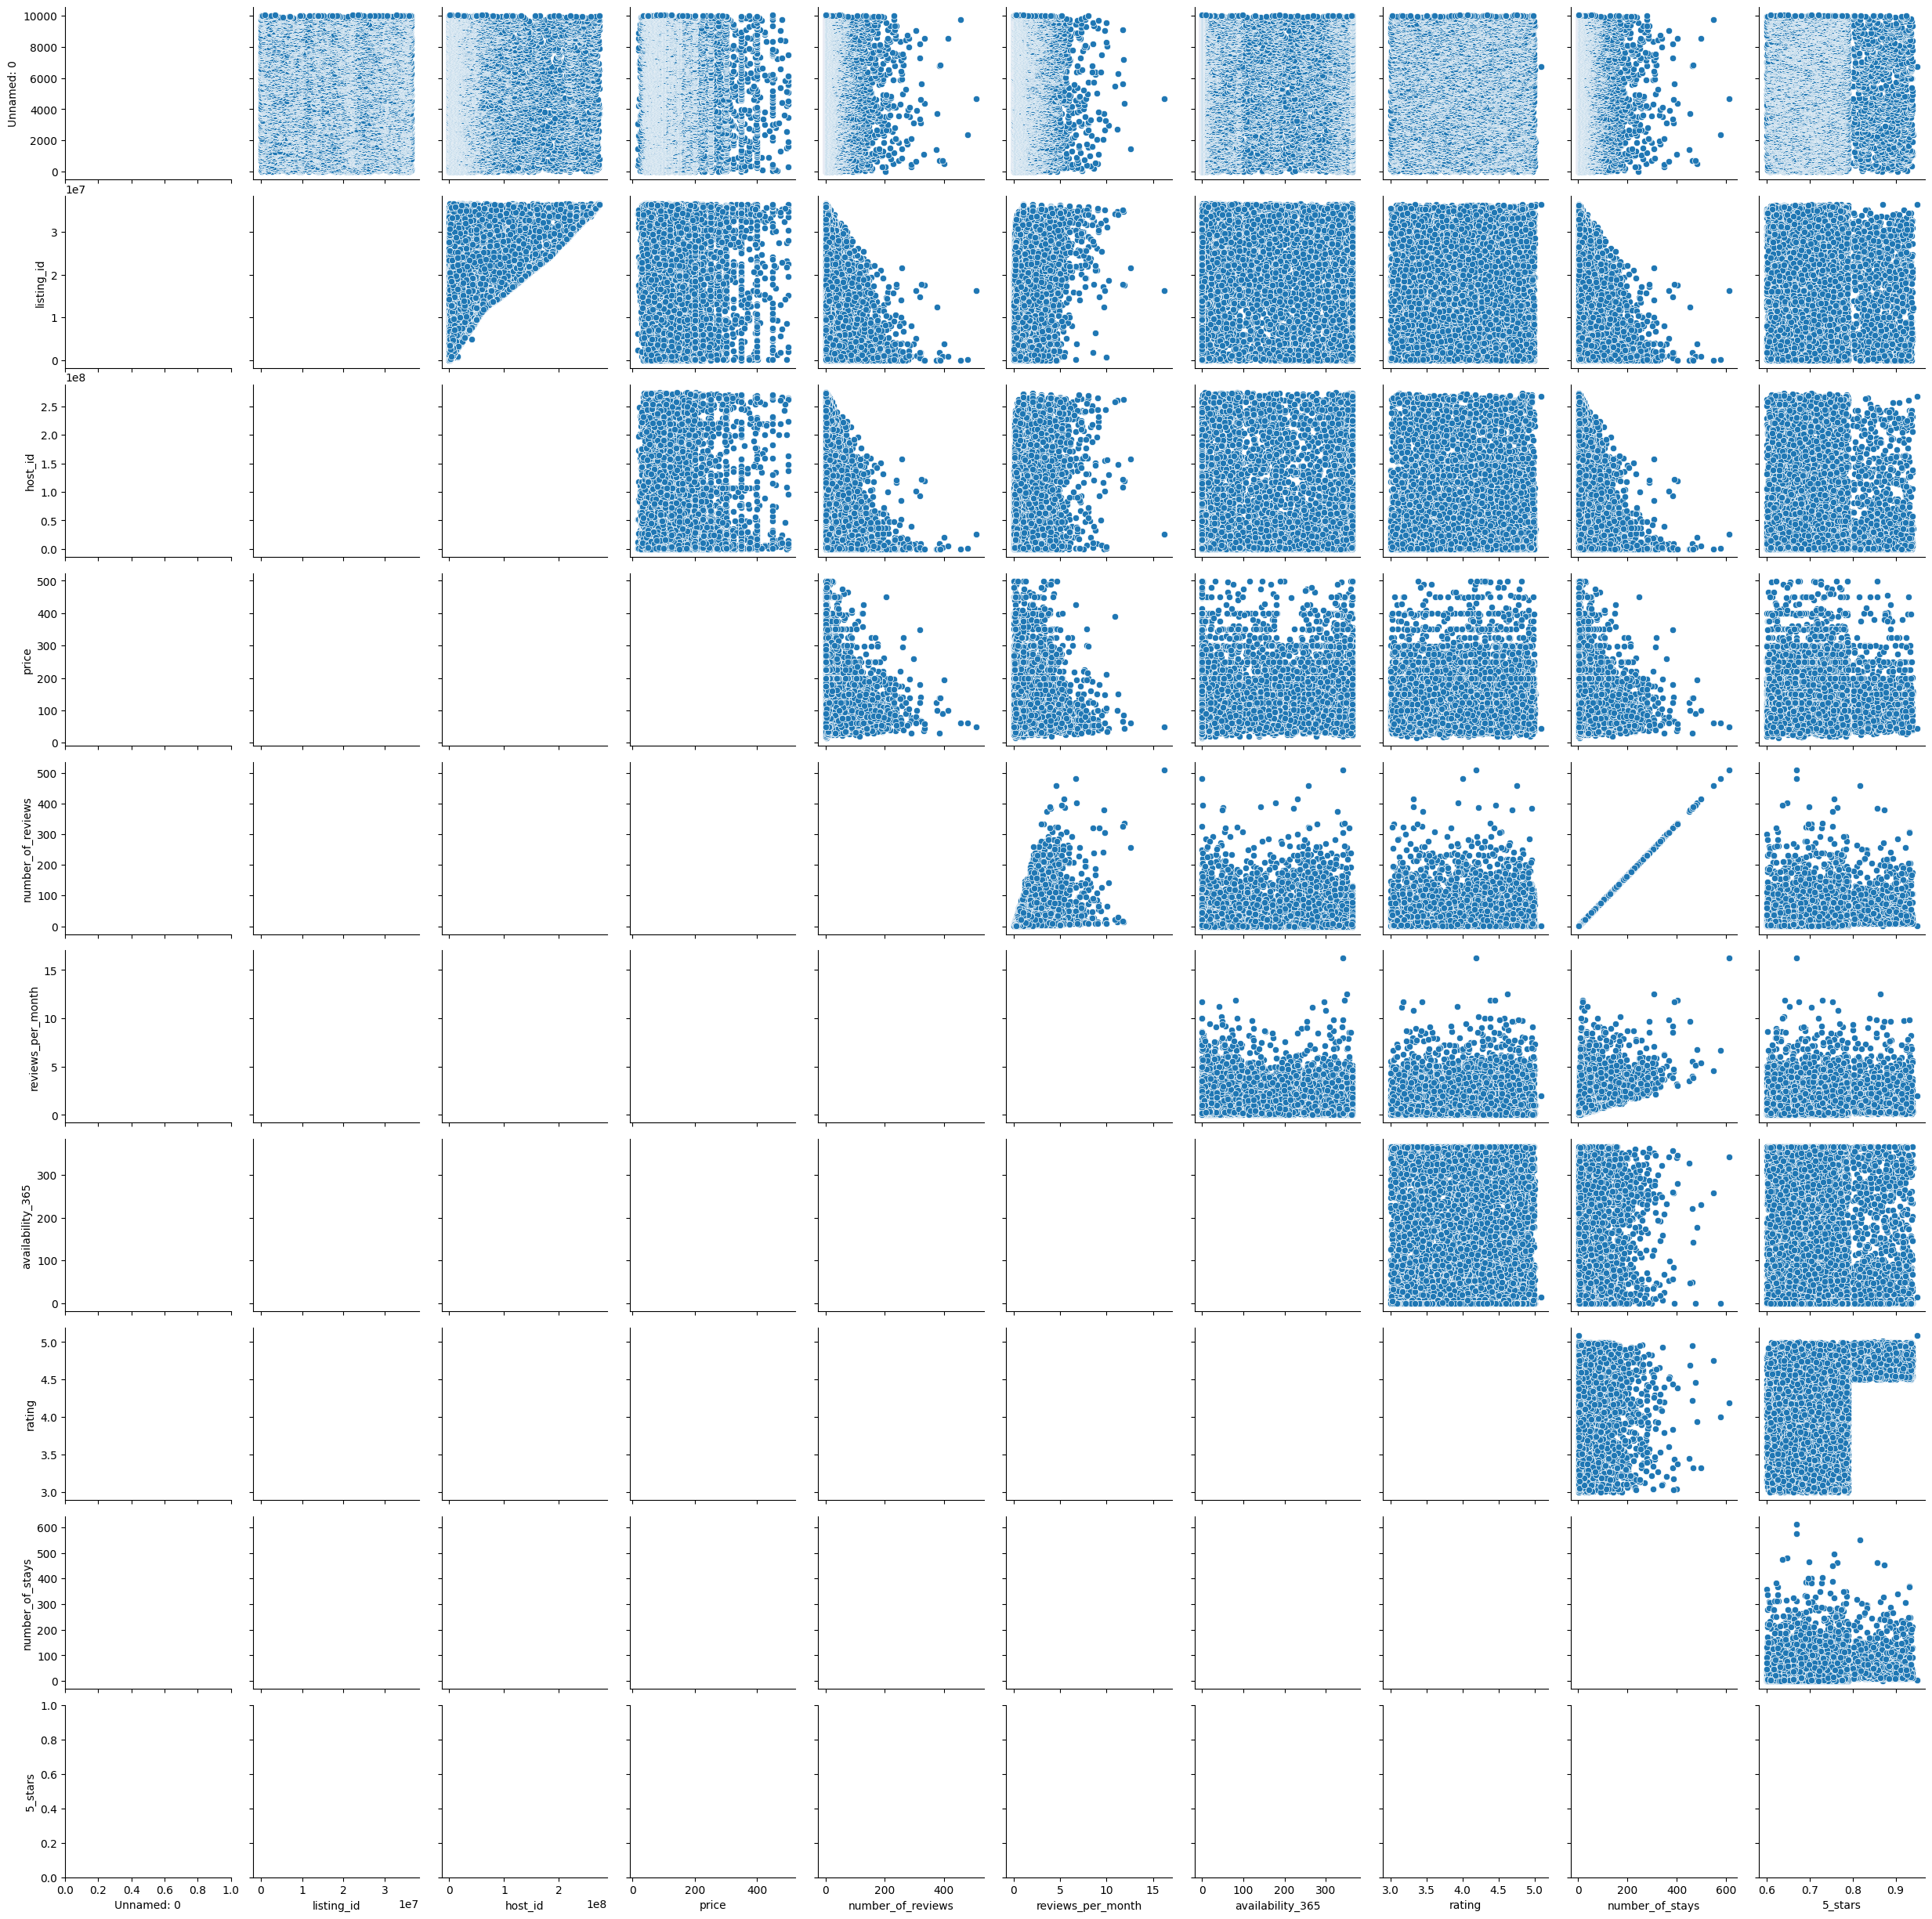

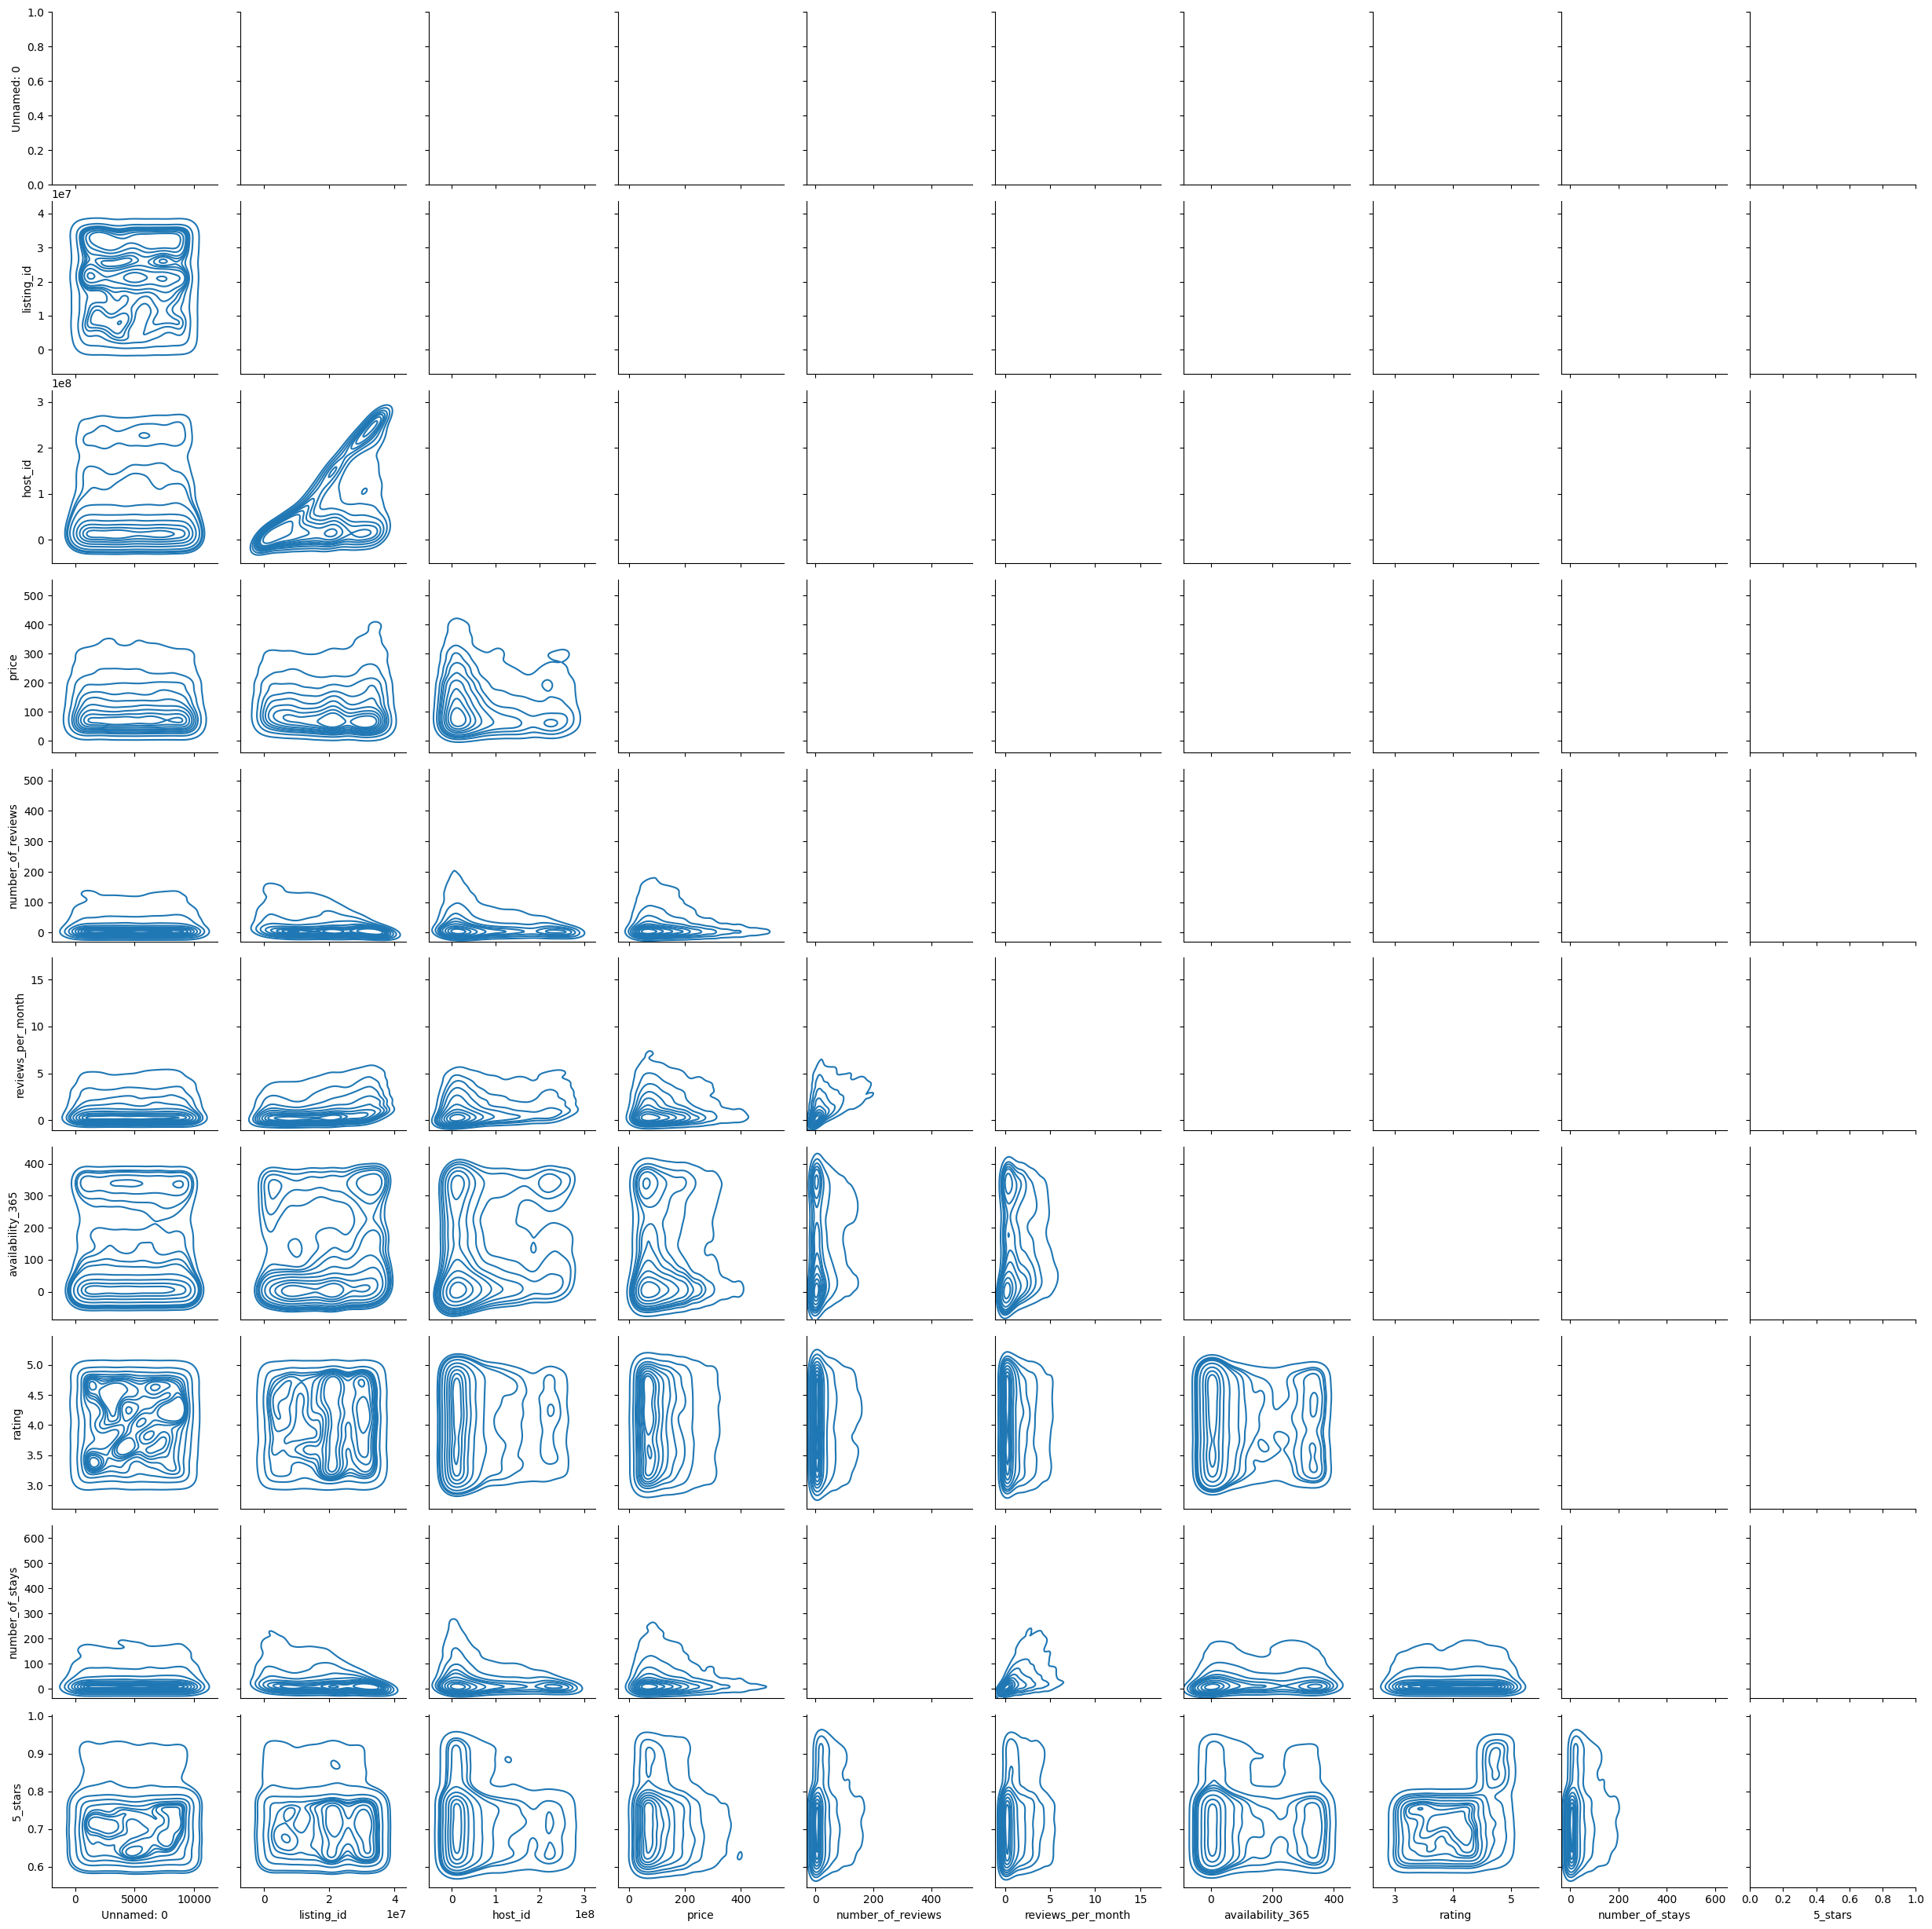

In [38]:
sns.PairGrid(filter_data).map_upper(sns.scatterplot)
sns.PairGrid(filter_data).map_lower(sns.kdeplot)
plt.show()

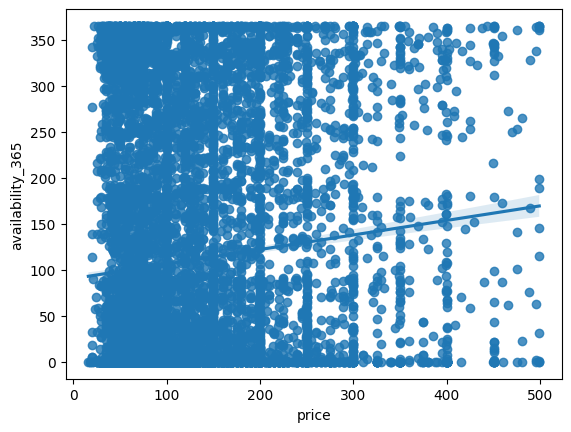

In [39]:
sns.regplot(data=filter_data, x='price', y='availability_365')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataframe
url = 'https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true'
df = pd.read_csv(url)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df.dropna(subset=['coordinates', 'price'], inplace=True)

# Extract latitude and longitude from the 'coordinates' column and convert to numeric
df[['latitude', 'longitude']] = df['coordinates'].str.replace('(', '').str.replace(')', '').str.split(', ', expand=True)
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

# Create 'availability' column
df['availability'] = pd.cut(df['availability_365'], bins=[0, 90, 180, 270, 365],
                                  labels=['0-90 days', '91-180', '181-270', '271-365'])


# Separate features (X) and target variable (y)
# Drop original non-numeric columns and the original 'coordinates' column
X = df.drop(['price', 'name', 'host_name', 'coordinates', 'last_review', 'listing_added', 'availability', 'room_type', 'neighbourhood_full'], axis=1)
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7824, 11)
X_test shape: (1957, 11)
y_train shape: (7824,)
y_test shape: (1957,)


In [41]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("First 5 predictions:", y_pred[:100])
print("First 5 actual values:", y_test[:100].values)

First 5 predictions: [ 82.091    114.55918   81.280785 135.80208   94.1943    90.884315
 207.70636  130.34656  440.1167   133.53745  186.40424  212.34192
  65.82516  132.36111   78.723236 119.88828  121.16535  214.79877
 155.28459  181.48701   86.12077  124.30155  166.56702  203.18289
 115.77352  156.10332  242.50027   93.10916  151.71904  485.18884
 214.52774  240.78      81.81486  121.021545 106.75566  118.78046
 175.79121   77.26799  106.43778  207.26627  221.18951   94.62188
  89.588    202.3337   230.2731    98.843636  90.43753  123.92522
  73.93528  128.64786  100.724014 163.5895   110.02755  103.26655
 232.30357  212.68042   71.072075 112.72857  159.0381    72.55629
 141.25803  219.69275  104.24506  213.09242  193.04782  102.19206
 112.205795  91.32897  114.68799  216.7423    64.489105 192.07439
 125.769646 187.27496  175.70314  221.47806  178.54527   90.034225
 197.34526   67.27329  141.58954  134.65372  119.08553   87.250206
  92.64158  115.13224  189.0056   135.65366  157.052

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 84.78
Mean Squared Error (MSE): 65704.82
Root Mean Squared Error (RMSE): 256.33


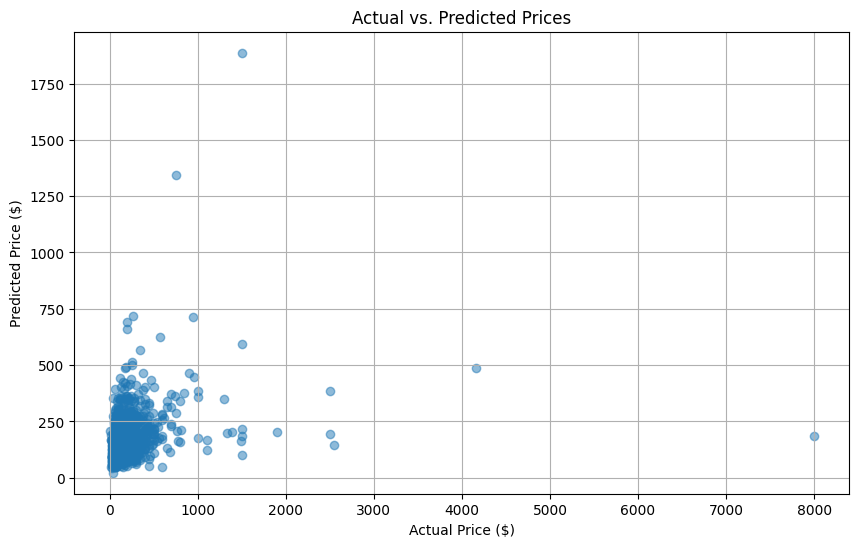

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)
plt.show()

In [45]:
import pandas as pd
url = 'https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true'
df = pd.read_csv(url)

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df.dropna(subset=['coordinates', 'price'], inplace=True)

df[['latitude', 'longitude']] = df['coordinates'].str.replace('(', '').str.replace(')', '').str.split(', ', expand=True)
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

df['availability'] = pd.cut(df['availability_365'], bins=[0, 90, 180, 270, 365],
                                  labels=['0-90 days', '91-180', '181-270', '271-365'], include_lowest=True)

df = pd.get_dummies(df, columns=['neighbourhood_full'], drop_first=True)

X = df.drop(['price', 'name', 'host_name', 'coordinates', 'last_review', 'listing_added', 'availability', 'room_type'], axis=1)
y = df['price']

display(X.head())
display(y.head())

Unnamed: 0  listing_id    host_id  number_of_reviews  reviews_per_month  \
0           0    13740704   20583125                 10               0.70   
1           1    22005115   82746113                  1               1.00   
2           2    21667615      78251                  0                NaN   
3           3     6425850   32715865                  5               0.13   
4           4    22986519  154262349                 23               2.29   

   availability_365    rating  number_of_stays   5_stars  latitude  ...  \
0                85  4.100954             12.0  0.609432  40.63222  ...   
1               145  3.367600              1.2  0.746135  40.78761  ...   
2                65       NaN              NaN       NaN  40.70070  ...   
3                 0  4.763203              6.0  0.769947  40.79169  ...   
4               102  3.822591             27.6  0.649383  40.71884  ...   

   neighbourhood_full_Staten Island, Randall Manor  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   neighbourhood_full_Staten Island, Rosebank  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   neighbourhood_full_Staten Island, Shore Acres  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   neighbourhood_full_Staten Island, South Beach  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   neighbourhood_full_Staten Island, St. George  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   neighbourhood_full_Staten Island, Stapleton  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   neighbourhood_full_Staten Island, Tompkinsville  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   neighbourhood_full_Staten Island, Tottenville  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   neighbourhood_full_Staten Island, West Brighton  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   neighbourhood_full_Staten Island, Westerleigh  
0                                          False  
1                                          False  
2                                          False  
3                                          False  
4          

0     45.0
1    135.0
2    150.0
3     86.0
4    160.0
Name: price, dtype: float64

In [46]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

A machine learning model to predict Airbnb listing prices based on location and neighborhood features.